In [9]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm


In [10]:
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')

In [11]:
a='/home/saibeast/Downloads/sales-of-shampoo-over-a-three-ye.csv'

In [12]:
data= pd.read_csv(a,header=0,parse_dates=True,index_col='Month')
data.head()


,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [13]:
data.columns

Index(['Sales of shampoo over a three year period'], dtype='object')

In [14]:
data.tail()

,Sales of shampoo over a three year period
Month,
3-09,682.0
3-10,475.3
3-11,581.3
3-12,646.9
Sales of shampoo over a three year period,NaN


In [15]:
data.isna().sum()

Sales of shampoo over a three year period    1
dtype: int64

In [16]:
data.size


37

In [17]:
data.dropna(inplace=True)


In [18]:
data.isna().sum()

Sales of shampoo over a three year period    0
dtype: int64

In [19]:
data.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


<AxesSubplot:xlabel='Month'>

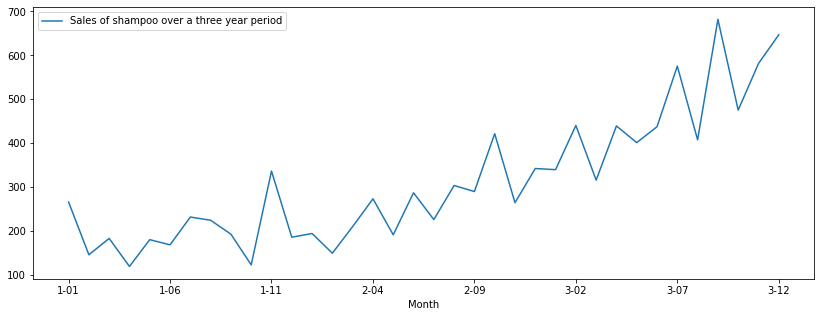

In [20]:
data.plot(figsize=(14,5))

In [21]:
p=d=q=range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
        

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:524.9772846827773
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:513.4523333718698
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:322.1284636513469
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:323.11848404583975
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:498.52554727445226
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:500.35767433145355
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:323.0332250857842
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:325.2194527207899
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:500.0450230461459
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:497.04421397294027
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:320.6913039241358
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:322.603458272185
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:489.9924700751898
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:491.8644349021724
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:322.59672367149636
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:324.52470888852974
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:429.22874651979794
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:423.53115567615845
ARI

In [23]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5838      0.435     -1.342      0.179      -1.436       0.269
ma.L1         -0.5236      0.340     -1.539      0.124      -1.190       0.143
ar.S.L12      -0.4976      0.622     -0.800      0.424      -1.717       0.722
sigma2      8404.9325   6127.832      1.372      0.170   -3605.398    2.04e+04


In [24]:
predict=results.get_prediction(start='1-03',dynamic=3)

In [25]:
pred= predict.conf_int()

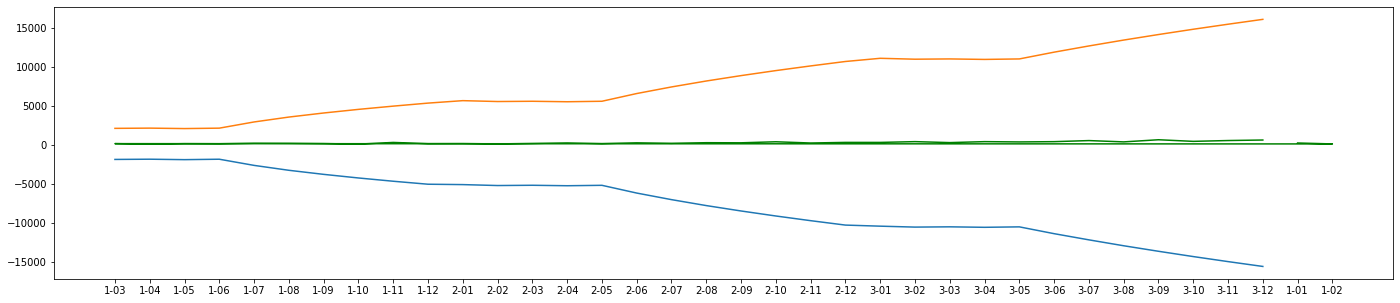

In [26]:
plt.figure(figsize=(24,5))
plt.plot(pred)
plt.plot(data,color='green')
plt.show()